In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_boston, load_iris
from sklearn.linear_model import LinearRegression,SGDRegressor,Ridge,Lasso,ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline


import mglearn
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

import warnings
warnings.simplefilter('ignore')

In [3]:
train_df = pd.read_excel('../../data/hyundaiCar.xlsx', sheet_name= 'train')
test_df  = pd.read_excel('../../data/hyundaiCar.xlsx', sheet_name= 'test')

In [4]:
x_train = train_df.iloc[:,1:]
y_train = train_df['가격']
x_test = test_df.iloc[:,1:]
y_test = test_df['가격']

## Train 데이터 encoding

In [6]:
lbl = LabelEncoder()

### 예측해야할 데이터
2015, '대형', 6.8, 159,23, 'LPG', 0,2359, 1935, '수동'

In [7]:
x_trainLabel = lbl.fit_transform( x_train['종류'] )
lbl.transform(['대형'])

array([0], dtype=int32)

In [8]:
x_trainFuel = lbl.fit_transform( x_train['연료'] )
lbl.transform(['LPG'])

array([0], dtype=int32)

In [9]:
x_trainGear = lbl.fit_transform( x_train['변속기'] )
lbl.transform(['수동'])

array([0], dtype=int32)

In [10]:
x_train['종류']=x_trainLabel
x_train['연료']=x_trainFuel
x_train['변속기']=x_trainGear
x_train

,년식,종류,연비,마력,토크,연료,하이브리드,배기량,중량,변속기
0,2015,2,11.8,172,21.0,1,0,1999,1300,1
1,2015,2,12.3,204,27.0,1,0,1591,1300,1
2,2015,1,15.0,100,13.6,1,0,1368,1035,0
3,2014,1,14.0,140,17.0,1,0,1591,1090,1
4,2015,0,9.6,175,46.0,2,0,2497,1990,1
...,...,...,...,...,...,...,...,...,...,...
66,2015,3,8.5,290,34.8,1,0,3342,1901,1
67,2012,1,13.3,108,13.9,1,0,1396,1040,1
68,2015,2,12.8,186,41.0,2,0,1995,1665,1
69,2015,3,17.7,156,19.3,1,1,1999,1585,1


## test encoding

In [11]:
lbl = LabelEncoder()
x_testLabel = lbl.fit_transform( x_test['종류'] )
x_testFuel = lbl.fit_transform( x_test['연료'] )
x_testGear = lbl.fit_transform( x_test['변속기'] )

In [12]:
x_test['종류']=x_testLabel
x_test['연료']=x_testFuel
x_test['변속기']=x_testGear

## Scale

In [13]:
predic=np.array([[2015, 0, 6.8, 159,23, 0, 0,2359, 1935, 0]])

In [14]:
scaleX   = StandardScaler()
x_trainS = scaleX.fit_transform(x_train)
x_testS = scaleX.fit_transform(x_test)

In [15]:
predicS  = scaleX.transform(predic)

### Ridge

In [16]:
pred_ridge = Ridge()
pred_ridge.fit(x_trainS,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

### Lasso

In [17]:
pred_Lasso = Lasso()
pred_Lasso.fit(x_trainS,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

### MLP

In [18]:
pred_MLP=MLPRegressor(alpha=0.001,
                      hidden_layer_sizes=(1000,100,5),
                      early_stopping=True,
                      random_state= 40)
pred_MLP.fit(x_trainS,y_train)

MLPRegressor(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=True, epsilon=1e-08,
             hidden_layer_sizes=(1000, 100, 5), learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=40, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

## 각 모델별 가격예측

In [19]:
print(f''' 
ridge  : {pred_ridge.predict(predicS).round(2) }
Lasso  : {pred_Lasso.predict(predicS).round(2) }
MLPRg  : {pred_MLP.predict(predicS).round(2) }
''')

 
ridge  : [1697.47]
Lasso  : [1662.86]
MLPRg  : [1784.64]



## 각 모델별 r2

In [20]:

print( f'''      * Ridge moedel *
        Train R2 : {pred_ridge.score(x_trainS,y_train)}
        Test  R2 : {pred_ridge.score(x_testS,y_test)}
        {'='*50}
      * Lasso moedel *
        Train R2 : {pred_Lasso.score(x_trainS,y_train)}
        Test  R2 : {pred_Lasso.score(x_testS,y_test)}
        {'='*50}
      * MLP moedel *
        Train R2 : {pred_MLP.score(x_trainS,y_train)}
        Test  R2 : {pred_MLP.score(x_testS,y_test)}
''')

      * Ridge moedel *
        Train R2 : 0.8733443420869326
        Test  R2 : 0.6877889787929315
      * Lasso moedel *
        Train R2 : 0.874138964538521
        Test  R2 : 0.6923356342408868
      * MLP moedel *
        Train R2 : 0.8319462520298788
        Test  R2 : 0.7399347735873267



<pre>
--------------------------------------------------------------------------
  아래 내용 질문할 거 -> 
  1. make_pipeline에 StandarScaler가 적용된 상태로 
  girdS를 통해 학습하면 y_train 도 같이 scaler가 적용되는건지 아닌지
  
  2. print(x_train) 을 찍어보면 scale전 원래 데이터가 나오는데
  scale이 어느시점에 적용되는건지
</pre>

# Ridge model

In [21]:
model_ridge_pipe = make_pipeline( StandardScaler(), Ridge())
param_value = {'ridge__alpha':[0.001,0.01,0.1,1,2,3,5,7,10]}

gridS = GridSearchCV( model_ridge_pipe, param_grid=param_value, cv=5)
gridS.fit( x_train, y_train)

print( x_train)
print('='*50)

gridT = GridSearchCV( model_ridge_pipe, param_grid=param_value, cv=5)
gridT.fit( x_test, y_test)

print(f'''      Ridge model 

    Train data option : {gridS.best_params_}
    Train data r2     : {gridS.best_score_}
    {'='*40}
    Test data option : {gridT.best_params_}
    Test data r2     : {gridT.best_score_}''')

      년식  종류    연비   마력    토크  연료  하이브리드   배기량    중량  변속기
0   2015   2  11.8  172  21.0   1      0  1999  1300    1
1   2015   2  12.3  204  27.0   1      0  1591  1300    1
2   2015   1  15.0  100  13.6   1      0  1368  1035    0
3   2014   1  14.0  140  17.0   1      0  1591  1090    1
4   2015   0   9.6  175  46.0   2      0  2497  1990    1
..   ...  ..   ...  ...   ...  ..    ...   ...   ...  ...
66  2015   3   8.5  290  34.8   1      0  3342  1901    1
67  2012   1  13.3  108  13.9   1      0  1396  1040    1
68  2015   2  12.8  186  41.0   2      0  1995  1665    1
69  2015   3  17.7  156  19.3   1      1  1999  1585    1
70  2015   0  13.8  202  45.0   2      0  2199  1691    1

[71 rows x 10 columns]
      Ridge model 

    Train data option : {'ridge__alpha': 7}
    Train data r2     : 0.7349945522024376
    Test data option : {'ridge__alpha': 2}
    Test data r2     : -0.5103439753788286


## Lasso r2 score

In [22]:
model_lasso_pipe = make_pipeline( StandardScaler(), Lasso())
param_value = {'lasso__alpha':[0.001,0.01,0.1,1,2,3,5,7,10]}

lasso_gridS = GridSearchCV( model_lasso_pipe, param_grid=param_value, cv=5)
lasso_gridS.fit( x_train, y_train)

lasso_gridT = GridSearchCV( model_lasso_pipe, param_grid=param_value, cv=5)
lasso_gridT.fit( x_test, y_test)

print(f'''      Lasso model 

    Train data option : {lasso_gridS.best_params_}
    Train data r2     : {lasso_gridS.best_score_}
    {'='*40}
    Test data option : {lasso_gridT.best_params_}
    Test data r2     : {lasso_gridT.best_score_}''')

      Lasso model 

    Train data option : {'lasso__alpha': 10}
    Train data r2     : 0.7010765922748761
    Test data option : {'lasso__alpha': 10}
    Test data r2     : -1.7828297744800081


## MLP r2 score

In [23]:
model_MLP_pipe = make_pipeline( StandardScaler(), MLPRegressor())
param_value = {'mlpregressor__alpha':[0.001,0.01,0.1,1,2,3,5,7,10]}

MLP_gridS = GridSearchCV( model_MLP_pipe, param_grid=param_value, cv= 5)
MLP_gridS.fit( x_train, y_train)

MLP_gridT = GridSearchCV( model_MLP_pipe, param_grid=param_value, cv= 5)
MLP_gridT.fit( x_test, y_test)

print(f'''      MLP model 

    Train data option : {MLP_gridS.best_params_}
    Train data r2     : {MLP_gridS.best_score_}
    {'='*40}
    Test data option : {MLP_gridT.best_params_}
    Test data r2     : {MLP_gridT.best_score_}''')

      MLP model 

    Train data option : {'mlpregressor__alpha': 0.1}
    Train data r2     : -5.886560879327232
    Test data option : {'mlpregressor__alpha': 2}
    Test data r2     : -6.119651372298324


# 2

In [25]:
base_df = pd.read_csv('../../data/프로야구.csv')
base_df.head()

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017)
0,켈리,SK,16,7,0,0,0,30,30,190.0,...,0.76,0.342,73.7,3.60,6.91,3.69,3.44,6.62,140000,85000
1,소사,LG,11,11,1,0,0,30,29,185.1,...,0.53,0.319,67.1,3.88,6.80,3.52,3.41,6.08,120000,50000
2,양현종,KIA,20,6,0,0,0,31,31,193.1,...,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,230000,150000
3,차우찬,LG,10,7,0,0,0,28,28,175.2,...,1.02,0.298,75.0,3.43,6.11,4.20,4.03,4.63,100000,100000
4,레일리,롯데,13,7,0,0,0,30,30,187.1,...,0.91,0.323,74.1,3.80,6.13,4.36,4.31,4.38,111000,85000


In [26]:
# 선수이름 제거
base_df = base_df.drop(['선수명'],axis=1)

## 2.데이터 나누기

### 연봉(2018)을 target으로 선정

In [27]:
x_base = base_df.iloc[:,:-2] 
x_base['연봉(2017)'] = base_df['연봉(2017)']
y_base = base_df.iloc[:,-2:-1] # 연봉(2018)

print(x_base.shape, y_base.shape)

(152, 20) (152, 1)


In [28]:
y_base.head()

,연봉(2018)
0,140000
1,120000
2,230000
3,100000
4,111000


In [29]:
x_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   팀명        152 non-null    object 
 1   승         152 non-null    int64  
 2   패         152 non-null    int64  
 3   세         152 non-null    int64  
 4   홀드        152 non-null    int64  
 5   블론        152 non-null    int64  
 6   경기        152 non-null    int64  
 7   선발        152 non-null    int64  
 8   이닝        152 non-null    float64
 9   삼진/9      152 non-null    float64
 10  볼넷/9      152 non-null    float64
 11  홈런/9      152 non-null    float64
 12  BABIP     152 non-null    float64
 13  LOB%      152 non-null    float64
 14  ERA       152 non-null    float64
 15  RA9-WAR   152 non-null    float64
 16  FIP       152 non-null    float64
 17  kFIP      152 non-null    float64
 18  WAR       152 non-null    float64
 19  연봉(2017)  152 non-null    int64  
dtypes: float64(11), int64(8), object

## Label_Encoding

In [30]:
lbl = LabelEncoder()
x_trainLabel = lbl.fit_transform(x_base['팀명'])
x_trainLabel

array([4, 2, 0, 2, 6, 1, 1, 5, 5, 0, 7, 5, 0, 6, 7, 6, 2, 7, 2, 6, 8, 4,
       3, 8, 4, 1, 3, 3, 3, 5, 1, 6, 6, 8, 8, 2, 0, 7, 2, 3, 8, 0, 2, 8,
       2, 4, 5, 4, 5, 7, 3, 6, 5, 4, 0, 8, 2, 1, 6, 7, 0, 8, 1, 1, 7, 2,
       1, 4, 4, 7, 2, 6, 1, 4, 0, 0, 2, 4, 7, 4, 4, 6, 7, 2, 0, 2, 8, 8,
       2, 6, 4, 3, 7, 5, 0, 1, 1, 5, 5, 3, 8, 4, 3, 5, 5, 7, 3, 7, 8, 7,
       4, 7, 7, 4, 0, 4, 6, 2, 1, 1, 1, 8, 8, 8, 5, 8, 1, 5, 8, 0, 5, 3,
       7, 0, 7, 8, 3, 6, 2, 1, 1, 4, 2, 3, 8, 7, 1, 8, 0, 6, 7, 1])

In [31]:
x_base['팀명'] = x_trainLabel
x_base.head()

,팀명,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,볼넷/9,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2017)
0,4,16,7,0,0,0,30,30,190.0,8.95,2.13,0.76,0.342,73.7,3.60,6.91,3.69,3.44,6.62,85000
1,2,11,11,1,0,0,30,29,185.1,7.43,1.85,0.53,0.319,67.1,3.88,6.80,3.52,3.41,6.08,50000
2,0,20,6,0,0,0,31,31,193.1,7.36,2.09,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,150000
3,2,10,7,0,0,0,28,28,175.2,8.04,1.95,1.02,0.298,75.0,3.43,6.11,4.20,4.03,4.63,100000
4,6,13,7,0,0,0,30,30,187.1,7.49,2.11,0.91,0.323,74.1,3.80,6.13,4.36,4.31,4.38,85000


In [32]:
x_base.shape

(152, 20)

## 정규화

In [33]:
scaleX = StandardScaler()
x_dataS = scaleX.fit_transform(x_base)

In [34]:
x_dataS.shape

(152, 20)

## train, test 데이터 나누기

In [35]:
x_train, x_test, y_train, y_test=train_test_split(x_dataS, y_base, test_size=0.2, random_state=1)

## ridge 적용

In [36]:
model_ridge1 = Ridge(alpha=1.0)
model_ridge1.fit(x_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [37]:
print(' R2 score')
print( 'train',model_ridge1.score( x_train, y_train ) )
print( 'test ', model_ridge1.score( x_test, y_test) )

 R2 score
train 0.9338397545480466
test  0.6938967933793535


## heatmap 

In [38]:
import seaborn as sb

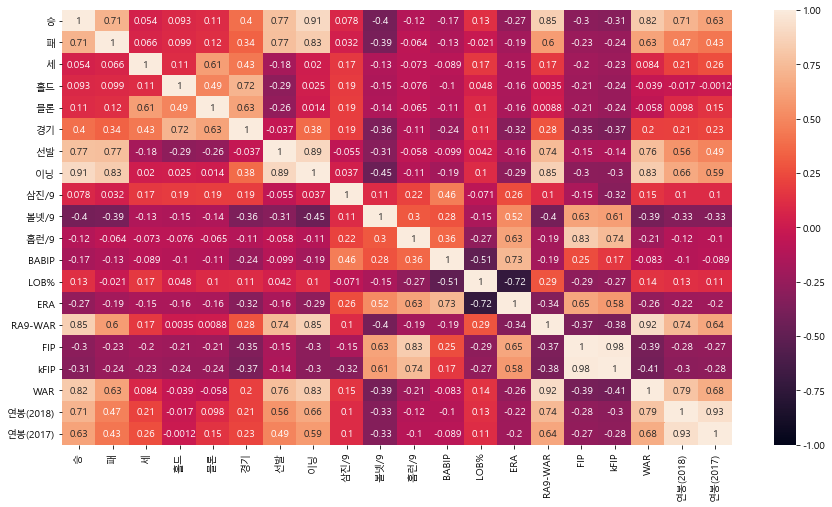

In [39]:
plt.figure(figsize=(15,8))
# annot=True 값표시
sb.heatmap(base_df.corr(), annot=True, vmin=-1, vmax=1)
plt.show()

## VIF 확인

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [41]:
# 빈 데이터 프레임을 만듬
# VIF의 값이 높은 변수들은 제거하고 다시 학습

vif = pd.DataFrame()

vif["VIF Factor"] =  [variance_inflation_factor(x_base.values, i) 
                        for i in range(x_base.shape[1])]
vif['features'] = x_base.columns
vif

,VIF Factor,features
0,3.870879,팀명
1,13.020695,승
2,10.614883,패
3,3.306571,세
4,4.846939,홀드
5,3.582084,블론
6,44.054165,경기
7,50.464996,선발
8,138.519634,이닝
9,565.198309,삼진/9


In [42]:
# VIF 70이상 제거
# vif 값이 높은 'FIP', 'kFIP', 'LOB%','홈런/9','볼넷/9','삼진/9', '이닝'제거
# x_base_ = x_base.drop(['FIP', 'kFIP', 'LOB%','홈런/9','볼넷/9','삼진/9','이닝'], axis=1)
# vif = pd.DataFrame()
# vif['VIF Factor']= [ variance_inflation_factor(x_base_.values, i )  for i in range( x_base_.shape[1] ) ]
# vif['features'] = x_base_.columns
# vif

## 다중공선성이 높은 칼럼제거

In [43]:
x_base_1 = x_base.drop(['FIP', 'kFIP'], axis=1)

In [44]:
vif = pd.DataFrame()
vif['VIF Factor']= [ variance_inflation_factor(x_base_1.values, i )  for i in range( x_base_1.shape[1] ) ]
vif['features'] = x_base_1.columns
vif

,VIF Factor,features
0,3.757663,팀명
1,12.971676,승
2,10.496733,패
3,3.292135,세
4,4.806581,홀드
5,3.554793,블론
6,42.757069,경기
7,50.197517,선발
8,136.357833,이닝
9,12.132830,삼진/9


## 제거후 재 학습

In [45]:
scaleX = StandardScaler()
x_dataS_ = scaleX.fit_transform(x_base_1)

In [46]:
x_dataS_.shape

(152, 18)

In [47]:
x_train1, x_test1, y_train1, y_test1=train_test_split(x_dataS_, y_base, test_size=0.2, random_state=1)

In [48]:
model_ridge2 = Ridge(alpha=1.0)
model_ridge2.fit(x_train1, y_train1)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [49]:
print( model_ridge2.score( x_train1, y_train1 ) )
print( model_ridge2.score( x_test1, y_test1) )

0.9338379655646267
0.694758916987952


In [50]:

print( f''' 
 칼럼 제거 전 
train : {model_ridge1.score( x_train, y_train )}
test  : {model_ridge1.score( x_test, y_test)}

 칼럼 제거 후
train : {model_ridge2.score( x_train1, y_train1 ) }
test  : {model_ridge2.score( x_test1, y_test1)}

크게 차이는 없음
더 많은 컬럼을 제거 해야함''')

 
 칼럼 제거 전 
train : 0.9338397545480466
test  : 0.6938967933793535

 칼럼 제거 후
train : 0.9338379655646267
test  : 0.694758916987952

크게 차이는 없음
